In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings

In [2]:
df= pd.read_excel("airbnb-listings.xlsx")

In [3]:
df

,ID,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Price,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,15141125,none,96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,2.0,...,50.0,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
1,9470166,none,9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Hortaleza,13.0,...,50.0,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict
2,17444981,none,118059488,Luis Enrique,2017-02-25,Spain,within an hour,100.0,NaN,1.0,...,77.0,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate
3,3284565,none,1892467,Laura,2012-03-09,"Madrid, Madrid, Spain",within a few hours,100.0,Embajadores,3.0,...,50.0,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict
4,499911,none,2467212,Joel,2012-05-26,"Madrid, Madrid, Spain",within an hour,100.0,Embajadores,1.0,...,95.0,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,16673027,none,24619741,Begoña,2014-12-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,5.0,...,80.0,11,98.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
13211,684744,none,1722284,Cesar,2012-02-08,"Madrid, Madrid, Spain",within an hour,100.0,Cortes,2.0,...,80.0,85,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible
13212,14770511,none,92135434,J.L,2016-08-27,"Madrid, Community of Madrid, Spain",a few days or more,0.0,Cortes,2.0,...,50.0,1,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict
13213,6605890,none,28559508,Victoria & Fernando & Marina,2015-03-01,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,4.0,...,70.0,122,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13215 entries, 0 to 13214
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           13215 non-null  int64  
 1   Experiences Offered          13215 non-null  object 
 2   Host ID                      13215 non-null  int64  
 3   Host Name                    13212 non-null  object 
 4   Host Since                   13212 non-null  object 
 5   Host Location                13173 non-null  object 
 6   Host Response Time           11558 non-null  object 
 7   Host Response Rate           11558 non-null  float64
 8   Host Neighbourhood           9963 non-null   object 
 9   Host Listings Count          13212 non-null  float64
 10  Host Verifications           13209 non-null  object 
 11  Neighbourhood Cleansed       13215 non-null  object 
 12  City                         13215 non-null  object 
 13  Zipcode         

In [7]:
df.head()

,ID,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Price,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,15141125,none,96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,2.0,...,50.0,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
1,9470166,none,9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Hortaleza,13.0,...,50.0,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict
2,17444981,none,118059488,Luis Enrique,2017-02-25,Spain,within an hour,100.0,NaN,1.0,...,77.0,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate
3,3284565,none,1892467,Laura,2012-03-09,"Madrid, Madrid, Spain",within a few hours,100.0,Embajadores,3.0,...,50.0,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict
4,499911,none,2467212,Joel,2012-05-26,"Madrid, Madrid, Spain",within an hour,100.0,Embajadores,1.0,...,95.0,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict


In [12]:
df.isnull().sum()

ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         3
Host Since                        3
Host Location                    42
Host Response Time             1657
Host Response Rate             1657
Host Neighbourhood             3252
Host Listings Count               3
Host Verifications                6
Neighbourhood Cleansed            0
City                              0
Zipcode                         439
State                            42
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Bed Type                          0
Price                             8
Number of Reviews           

In [13]:
# To fill the null values in \"Host Response Rate\" with value corresponding value to similar \"Host ID\""

# Group the data by "Host ID" and calculate the mode for each group
mode_values = df.groupby("Host ID")["Host Response Rate"].apply(lambda x: x.mode().iloc[0] if len(x.mode().tolist()) > 0 else "")

# Create a dictionary mapping "Host ID" values to "Host Response Rate" mode values
mode_mapping = mode_values.to_dict()

# Fill the null values in "Host Response Rate" with the corresponding value from the dictionary
df["Host Response Rate"] = df.apply(lambda x: mode_mapping[x["Host ID"]] if pd.isna(x["Host Response Rate"]) else x["Host Response Rate"], axis=1)

In [14]:
df.isnull().sum()

ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         3
Host Since                        3
Host Location                    42
Host Response Time             1657
Host Response Rate                0
Host Neighbourhood             3252
Host Listings Count               3
Host Verifications                6
Neighbourhood Cleansed            0
City                              0
Zipcode                         439
State                            42
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Bed Type                          0
Price                             8
Number of Reviews           

In [16]:
# To fill the null values in \"Host Response Time\" with value corresponding value to similar \"Host ID\""

# Group the data by "Host ID" and calculate the mode for each group
mode_values = df.groupby("Host ID")["Host Response Time"].apply(lambda x: x.mode().iloc[0] if len(x.mode().tolist()) > 0 else "")

# Create a dictionary mapping "Host ID" values to "Host Response Time" mode values
mode_mapping = mode_values.to_dict()

# Fill the null values in "Host Response Time" with the corresponding value from the dictionary
df["Host Response Time"] = df.apply(lambda x: mode_mapping[x["Host ID"]] if pd.isna(x["Host Response Time"]) else x["Host Response Time"], axis=1)

In [17]:
df.isnull().sum()

ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         3
Host Since                        3
Host Location                    42
Host Response Time                0
Host Response Rate                0
Host Neighbourhood             3252
Host Listings Count               3
Host Verifications                6
Neighbourhood Cleansed            0
City                              0
Zipcode                         439
State                            42
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Bed Type                          0
Price                             8
Number of Reviews           

In [20]:
# To fill the null values in \"Host Neighbourhood\" with value corresponding value to similar \"Host ID\""

# Group the data by "Host ID" and calculate the mode for each group
mode_values = df.groupby("Host ID")["Host Neighbourhood"].apply(lambda x: x.mode().iloc[0] if len(x.mode().tolist()) > 0 else "")

# Create a dictionary mapping "Host ID" values to "Host Neighbourhood" mode values
mode_mapping = mode_values.to_dict()

# Fill the null values in "Host Neighbourhood" with the corresponding value from the dictionary
df["Host Neighbourhood"] = df.apply(lambda x: mode_mapping[x["Host ID"]] if pd.isna(x["Host Neighbourhood"]) else x["Host Neighbourhood"], axis=1)

In [21]:
df.isnull().sum()

ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         3
Host Since                        3
Host Location                    42
Host Response Time                0
Host Response Rate                0
Host Neighbourhood                0
Host Listings Count               3
Host Verifications                6
Neighbourhood Cleansed            0
City                              0
Zipcode                         439
State                            42
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Bed Type                          0
Price                             8
Number of Reviews           

In [24]:
# To fill the null values in \"State\" with value corresponding value to similar \"Host ID\""

# Group the data by "Host ID" and calculate the mode for each group
mode_values = df.groupby("Host ID")["State"].apply(lambda x: x.mode().iloc[0] if len(x.mode().tolist()) > 0 else "")

# Create a dictionary mapping "Host ID" values to "State" mode values
mode_mapping = mode_values.to_dict()

# Fill the null values in "State" with the corresponding value from the dictionary
df["State"] = df.apply(lambda x: mode_mapping[x["Host ID"]] if pd.isna(x["State"]) else x["State"], axis=1)

In [25]:
df.isnull().sum()

ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         3
Host Since                        3
Host Location                    42
Host Response Time                0
Host Response Rate                0
Host Neighbourhood                0
Host Listings Count               3
Host Verifications                6
Neighbourhood Cleansed            0
City                              0
Zipcode                         439
State                             0
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Bed Type                          0
Price                             8
Number of Reviews           

In [26]:
# Making a dataframe df2 which only contains those records in which have reviews and ratings\n"
df2 = df[df["Number of Reviews"] != 0]

In [27]:
df2

,ID,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Price,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,15141125,none,96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",within an hour,100.0,,2.0,...,50.0,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
1,9470166,none,9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Hortaleza,13.0,...,50.0,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict
2,17444981,none,118059488,Luis Enrique,2017-02-25,Spain,within an hour,100.0,,1.0,...,77.0,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate
3,3284565,none,1892467,Laura,2012-03-09,"Madrid, Madrid, Spain",within a few hours,100.0,Embajadores,3.0,...,50.0,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict
4,499911,none,2467212,Joel,2012-05-26,"Madrid, Madrid, Spain",within an hour,100.0,Embajadores,1.0,...,95.0,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,16673027,none,24619741,Begoña,2014-12-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,5.0,...,80.0,11,98.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
13211,684744,none,1722284,Cesar,2012-02-08,"Madrid, Madrid, Spain",within an hour,100.0,Cortes,2.0,...,80.0,85,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible
13212,14770511,none,92135434,J.L,2016-08-27,"Madrid, Community of Madrid, Spain",a few days or more,0.0,Cortes,2.0,...,50.0,1,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict
13213,6605890,none,28559508,Victoria & Fernando & Marina,2015-03-01,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,4.0,...,70.0,122,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate


In [29]:
# Dropping column \"Zipcode\"
df2.drop('Zipcode',axis=1, inplace=True)

KeyError: "['Zipcode'] not found in axis"

In [30]:
# Dropping rows with null values \n"
df2.dropna(inplace=True)

C:\Users\Itaf Kerchaoui\AppData\Local\Temp\ipykernel_15432\1396116254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [31]:
df2

,ID,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,...,Price,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,15141125,none,96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",within an hour,100.0,,2.0,...,50.0,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
1,9470166,none,9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Hortaleza,13.0,...,50.0,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict
2,17444981,none,118059488,Luis Enrique,2017-02-25,Spain,within an hour,100.0,,1.0,...,77.0,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate
3,3284565,none,1892467,Laura,2012-03-09,"Madrid, Madrid, Spain",within a few hours,100.0,Embajadores,3.0,...,50.0,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict
4,499911,none,2467212,Joel,2012-05-26,"Madrid, Madrid, Spain",within an hour,100.0,Embajadores,1.0,...,95.0,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,16673027,none,24619741,Begoña,2014-12-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,5.0,...,80.0,11,98.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
13211,684744,none,1722284,Cesar,2012-02-08,"Madrid, Madrid, Spain",within an hour,100.0,Cortes,2.0,...,80.0,85,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible
13212,14770511,none,92135434,J.L,2016-08-27,"Madrid, Community of Madrid, Spain",a few days or more,0.0,Cortes,2.0,...,50.0,1,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict
13213,6605890,none,28559508,Victoria & Fernando & Marina,2015-03-01,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,4.0,...,70.0,122,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate


In [32]:
df.shape

(13215, 36)

In [33]:
df2.to_excel("Airbnb_Cleaned.xlsx")

In [34]:
# Fitering records of \"Madrid\" city only\n",
madrid = df2[(df2["Country"]=="Spain") & (df2["City"]=="Madrid")]

In [35]:
madrid.columns

Index(['ID', 'Experiences Offered', 'Host ID', 'Host Name', 'Host Since',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Neighbourhood', 'Host Listings Count', 'Host Verifications',
       'Neighbourhood Cleansed', 'City', 'State', 'Country Code', 'Country',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')

In [36]:
# Dropping columns :  'Neighbourhood Cleansed','Country Code','Host Location'\n"

madrid.drop([ 'Neighbourhood Cleansed','Country Code','Host Location'],axis=1,inplace=True)

C:\Users\Itaf Kerchaoui\AppData\Local\Temp\ipykernel_15432\4093182580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid.drop([ 'Neighbourhood Cleansed','Country Code','Host Location'],axis=1,inplace=True)


In [37]:
madrid.shape

(10250, 32)

In [38]:
madrid.to_excel("Madrid_Airbnb.xlsx")

In [43]:
madrid = pd.read_excel("Madrid_airbnb.xlsx")

In [44]:
madrid.isnull().sum()

Unnamed: 0                        0
ID                                0
Experiences Offered               0
Host ID                           0
Host Name                         0
Host Since                        0
Host Response Time              622
Host Response Rate              622
Host Neighbourhood             2337
Host Listings Count               0
Host Verifications                0
City                              0
State                            26
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness   

In [45]:
# Dropping null values \n"
madrid.dropna(inplace=True)

In [46]:
madrid.isnull().sum()

Unnamed: 0                     0
ID                             0
Experiences Offered            0
Host ID                        0
Host Name                      0
Host Since                     0
Host Response Time             0
Host Response Rate             0
Host Neighbourhood             0
Host Listings Count            0
Host Verifications             0
City                           0
State                          0
Country                        0
Latitude                       0
Longitude                      0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Number of Reviews              0
Review Scores Rating           0
Review Scores Accuracy         0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Sco

In [47]:
# Saving the file in excel format\n"
madrid.to_excel("Airbnb_Madrid.xlsx")

In [48]:
madrid.info

<bound method DataFrame.info of        Unnamed: 0        ID Experiences Offered   Host ID  \
1               1   9470166                none   9885245   
3               3   3284565                none   1892467   
4               4    499911                none   2467212   
5               5   1346747                none   7306349   
8               8   7818234                none   5239042   
...           ...       ...                 ...       ...   
10245       13210  16673027                none  24619741   
10246       13211    684744                none   1722284   
10247       13212  14770511                none  92135434   
10248       13213   6605890                none  28559508   
10249       13214  12272825                none  44267738   

                          Host Name  Host Since  Host Response Time  \
1                             Jorge  2013-11-08      within an hour   
3                             Laura  2012-03-09  within a few hours   
4                     

In [49]:
madrid["Host Response Time"].value_counts(normalize=True)

within an hour        0.664618
within a few hours    0.212186
within a day          0.108765
a few days or more    0.014431
Name: Host Response Time, dtype: float64

In [50]:
#### Almost 66.5% of the host respond within an hour

In [51]:
pd.DataFrame(madrid.groupby("Host Neighbourhood")["Host Response Rate"].mean()).sort_values(by="Host Response Rate").head()

,Host Response Rate
Host Neighbourhood,
Tour Eiffel - Champ de Mars,50.000000
Neukölln,70.000000
Vicálvaro,70.909091
Rios Rosas,80.539568
Villa de Vallecas,87.038462


In [52]:
# the Host Neighbourhodd Tour Eiffel - Champ de Mars has the worst Response Rate (50.000000)

In [53]:
madrid["Property Type"].value_counts()

Apartment             6274
House                  434
Bed & Breakfast        200
Condominium            184
Loft                   179
Other                  130
Guesthouse              26
Dorm                    21
Chalet                  13
Serviced apartment       8
Earth House              3
Townhouse                3
Hostel                   3
Villa                    2
Tent                     1
Boutique hotel           1
Casa particular          1
Timeshare                1
Name: Property Type, dtype: int64

In [54]:
#### Apartments are the most common rented property type

In [55]:
# These are the average price of each type of property",
((madrid.groupby("Property Type")["Price"].mean())).sort_values(ascending=False)

Property Type
Villa                 267.500000
Townhouse              75.000000
Loft                   71.134078
Apartment              71.041600
Other                  63.076923
Condominium            60.896739
House                  57.193548
Boutique hotel         55.000000
Chalet                 54.692308
Serviced apartment     54.500000
Hostel                 42.666667
Guesthouse             42.576923
Bed & Breakfast        34.500000
Dorm                   33.428571
Casa particular        30.000000
Tent                   25.000000
Earth House            21.000000
Timeshare              20.000000
Name: Price, dtype: float64

In [56]:
madrid["Room Type"].value_counts()

Entire home/apt    5121
Private room       2270
Shared room          93
Name: Room Type, dtype: int64

In [57]:
# These are the mean prices for each room type
df.groupby("Room Type")["Price"].mean()

Room Type
Entire home/apt    87.283129
Private room       34.249658
Shared room        29.853403
Name: Price, dtype: float64

In [58]:
#### These are the average number of guests that each property type can accommodate
((madrid.groupby("Property Type")["Accommodates"].median())).sort_values(ascending=False)

Property Type
Villa                 14.0
Apartment              4.0
Loft                   3.0
Other                  3.0
Boutique hotel         2.0
Chalet                 2.0
Condominium            2.0
Dorm                   2.0
Earth House            2.0
Guesthouse             2.0
Bed & Breakfast        2.0
House                  2.0
Serviced apartment     2.0
Tent                   2.0
Timeshare              2.0
Townhouse              2.0
Hostel                 2.0
Casa particular        1.0
Name: Accommodates, dtype: float64

In [59]:
# Average number of bedrooms in each type of property\n"
((madrid.groupby("Property Type")["Bedrooms"].median())).sort_values(ascending=False)

Property Type
Villa                 6.0
Bed & Breakfast       1.0
Townhouse             1.0
Timeshare             1.0
Tent                  1.0
Other                 1.0
Loft                  1.0
House                 1.0
Apartment             1.0
Guesthouse            1.0
Earth House           1.0
Dorm                  1.0
Condominium           1.0
Chalet                1.0
Casa particular       1.0
Boutique hotel        1.0
Hostel                1.0
Serviced apartment    0.0
Name: Bedrooms, dtype: float64

In [60]:
# Average number of bathrooms in each type of property
((madrid.groupby("Property Type")["Bathrooms"].median())).sort_values(ascending=False)

Property Type
Villa                 4.25
Timeshare             2.00
Bed & Breakfast       1.00
Townhouse             1.00
Tent                  1.00
Serviced apartment    1.00
Other                 1.00
Loft                  1.00
House                 1.00
Apartment             1.00
Guesthouse            1.00
Earth House           1.00
Dorm                  1.00
Condominium           1.00
Chalet                1.00
Casa particular       1.00
Boutique hotel        1.00
Hostel                1.00
Name: Bathrooms, dtype: float64

In [61]:
# Average number of beds in each type of property
((madrid.groupby("Property Type")["Beds"].median())).sort_values(ascending=False)

Property Type
Villa                 13.0
Dorm                   2.0
Other                  2.0
Loft                   2.0
House                  2.0
Earth House            2.0
Apartment              2.0
Chalet                 2.0
Condominium            1.0
Guesthouse             1.0
Bed & Breakfast        1.0
Casa particular        1.0
Boutique hotel         1.0
Serviced apartment     1.0
Tent                   1.0
Timeshare              1.0
Townhouse              1.0
Hostel                 1.0
Name: Beds, dtype: float64

In [62]:
pd.DataFrame(((madrid.groupby("Host Neighbourhood")["Price"].mean())).sort_values(ascending=False))

,Price
Host Neighbourhood,
Rummelsburg,199.000000
Brickell,190.000000
El Raval,175.600000
Chelsea,156.000000
Casco Antiguo,155.250000
...,...
Majorstuen,30.000000
Tour Eiffel - Champ de Mars,30.000000
Ipanema,29.000000


In [63]:
pd.DataFrame(((madrid.groupby("Host Neighbourhood")["Review Scores Rating"].mean())).sort_values(ascending=False))

,Review Scores Rating
Host Neighbourhood,
Dupont Circle,100.0
Baixa,100.0
La Saïdia,100.0
Brickell,100.0
Brentwood,100.0
...,...
Casco Antiguo,82.5
El Born,81.5
Vila de Gràcia,80.6


In [64]:
bedroom_avg_price = (pd.DataFrame(madrid.groupby("Bedrooms")["Price"].mean())).reset_index()

In [65]:
numerical_cols = ["Price", "Accommodates", "Bathrooms", "Bedrooms", "Beds", "Number of Reviews",
                     "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
                      "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
                      "Review Scores Value"]

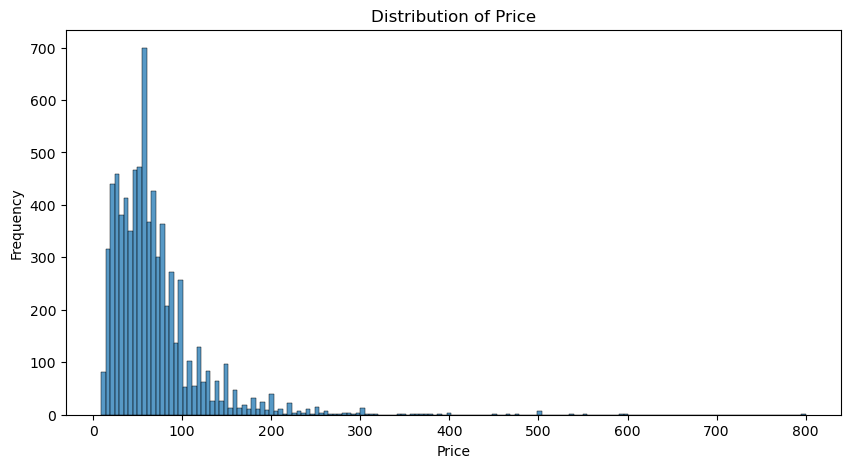

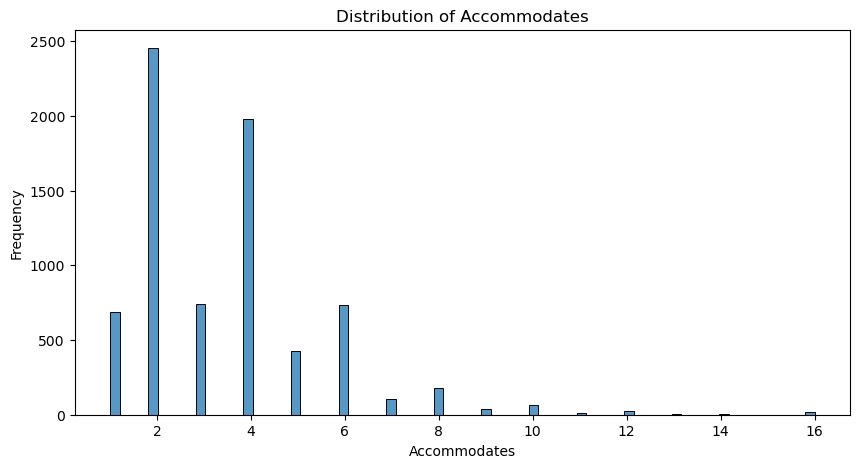

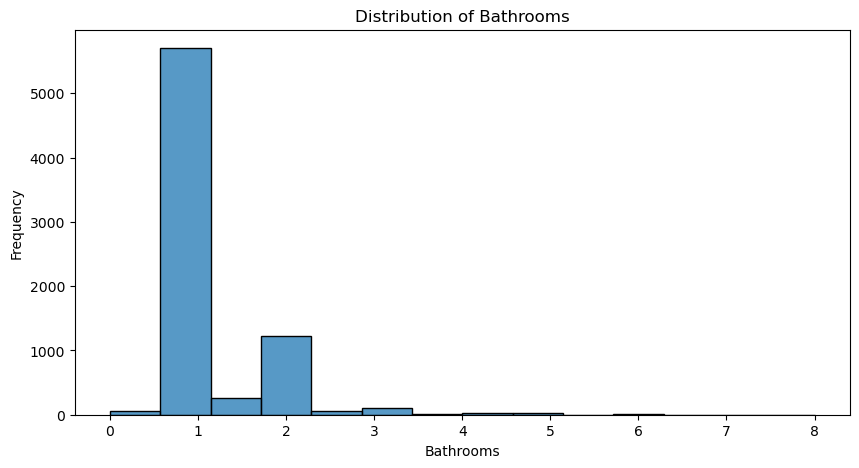

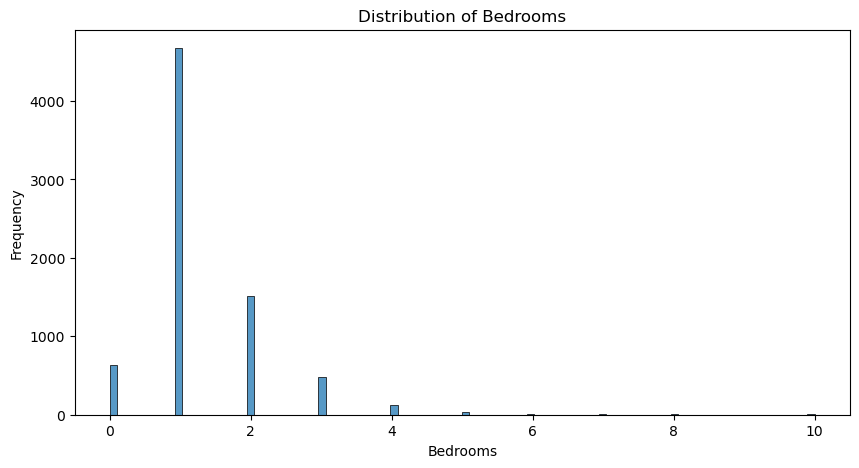

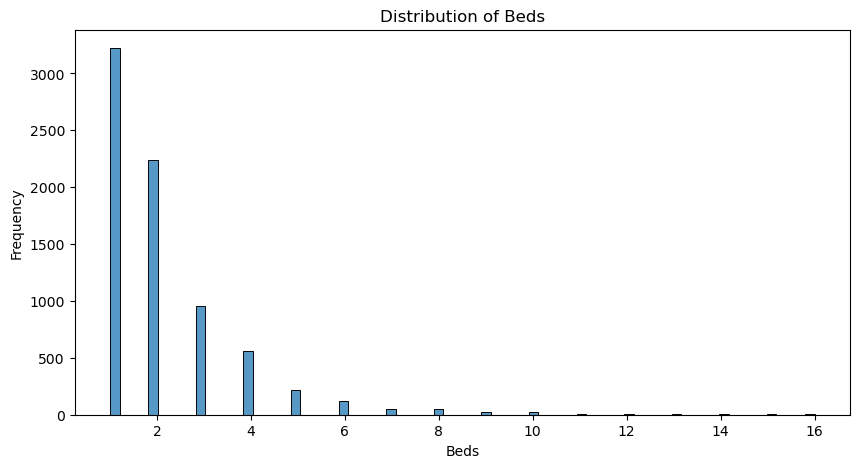

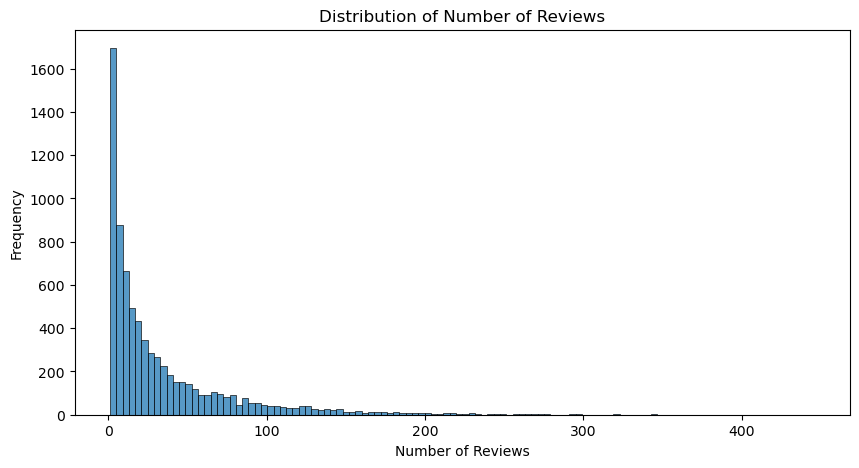

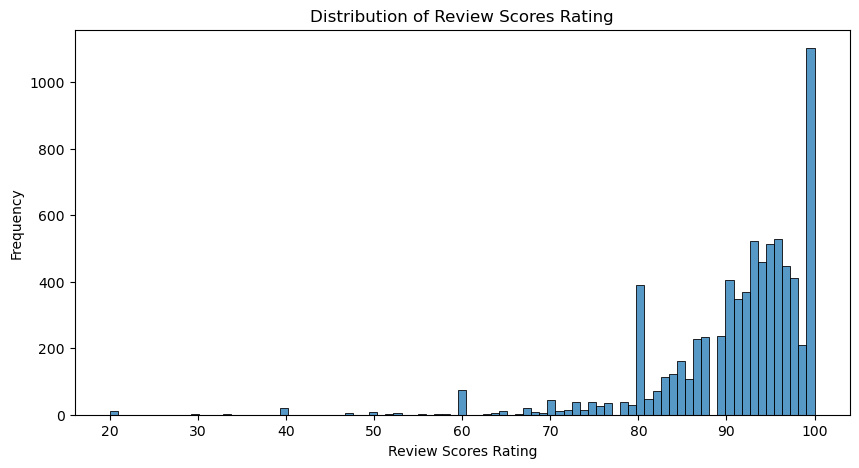

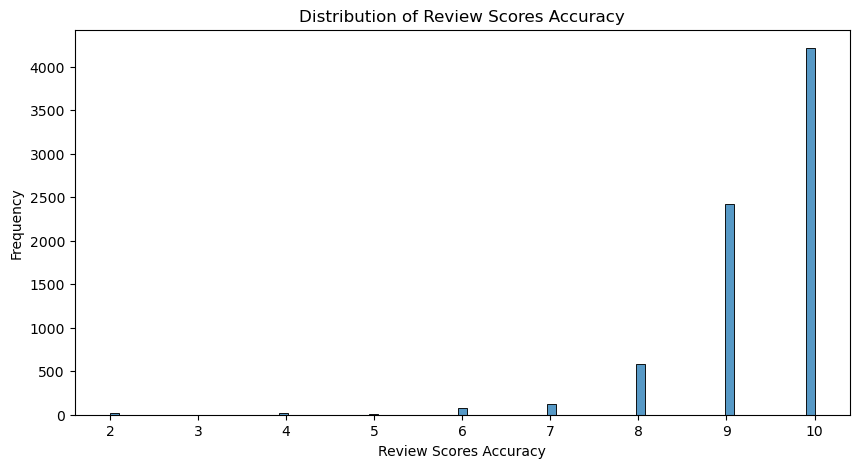

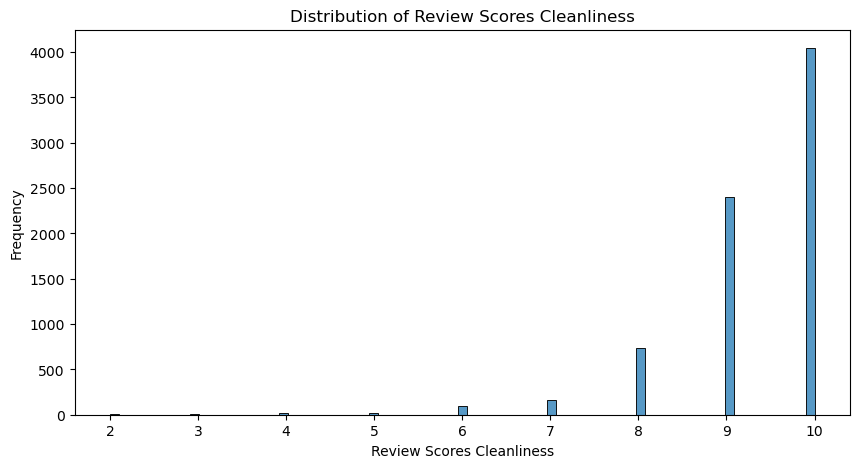

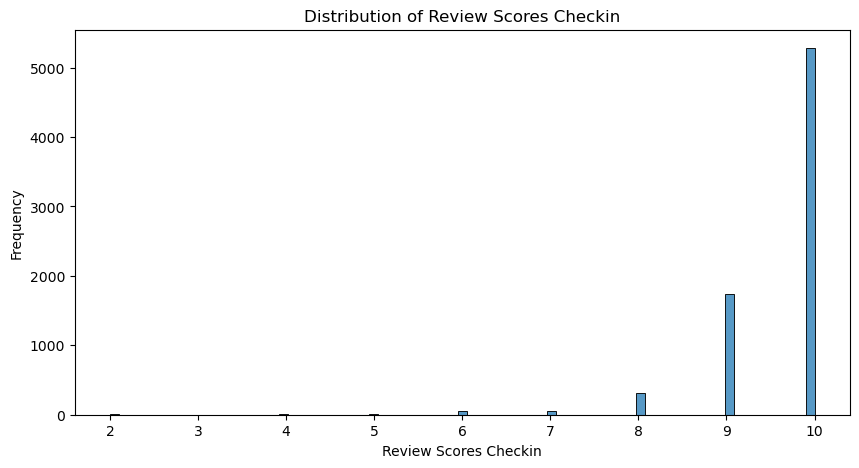

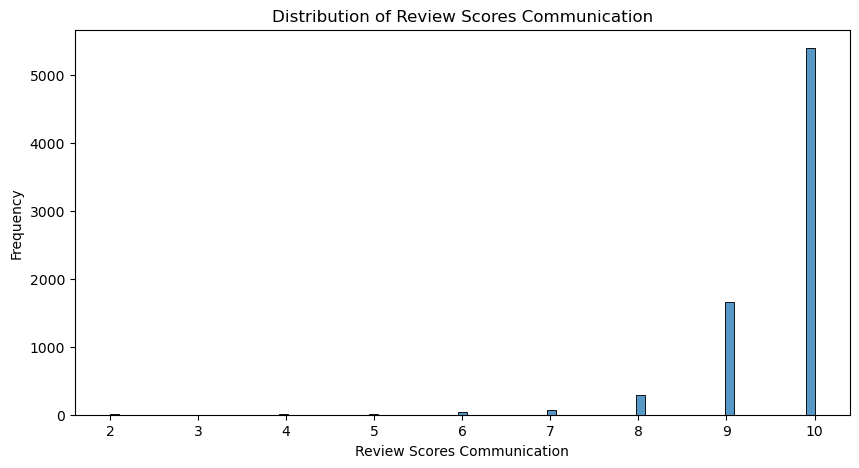

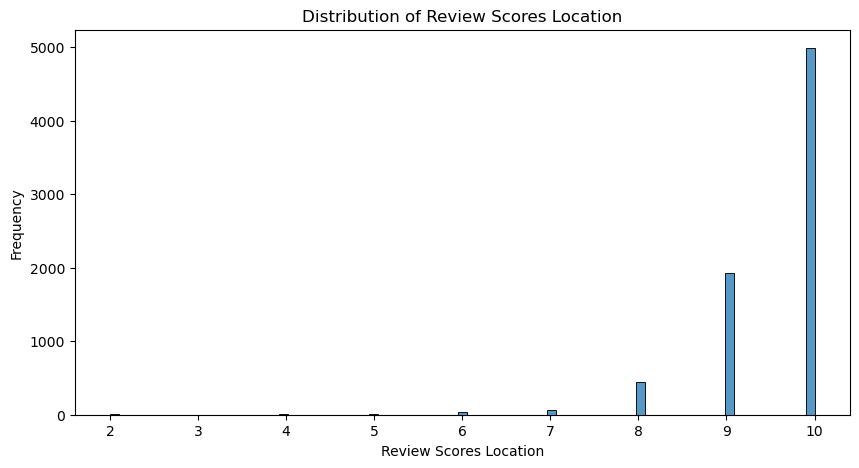

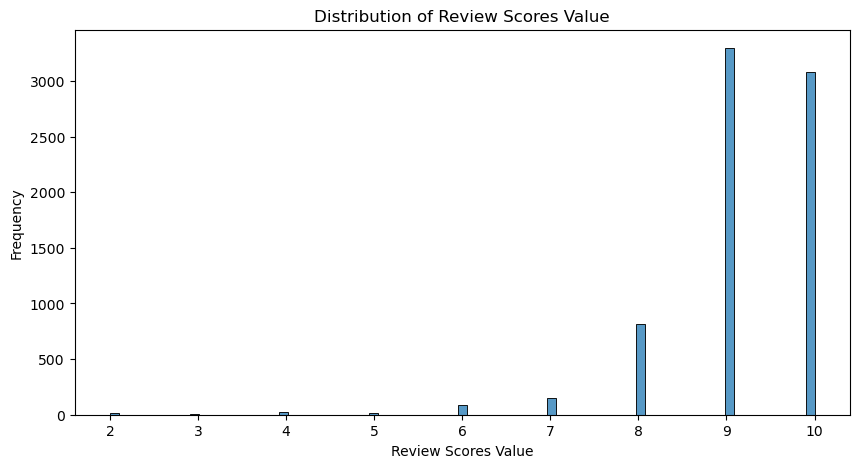

In [66]:
for col in numerical_cols:
        plt.figure(figsize=(10,5)),
        sns.histplot(madrid[col]),
        plt.title("Distribution of " + col),
        plt.xlabel(col),
        plt.ylabel("Frequency"),
        plt.show()

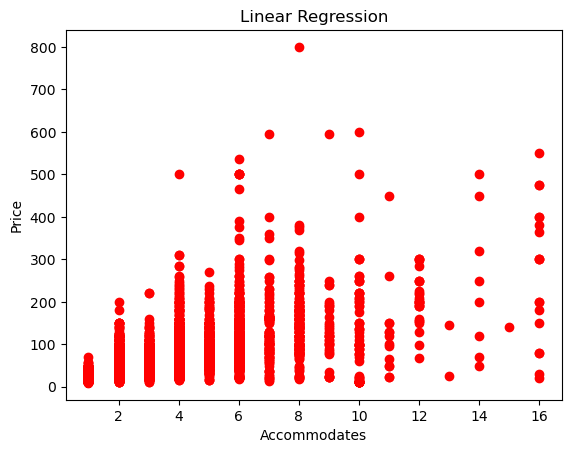

ValueError: could not convert string to float: 'none'

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def predict_price(area):
    # Reading the dataset
    df = pd.read_excel("Airbnb_Madrid.xlsx")

    # Plotting the scatter plot
    plt.scatter(df['Accommodates'], df['Price'], color='red')
    plt.title('Linear Regression')
    plt.xlabel('Accommodates')
    plt.ylabel('Price')
    plt.show()

    # Train-Test Split
    X = df.iloc[:, :-1].values
    y = df.iloc[:, 1].values

    # Fitting the model
    reg = LinearRegression()
    reg.fit(X, y)

    # Making predictions
    y_pred = reg.predict([[area]])

    return y_pred[0]

# Example usage
price = predict_price(2500)
print("The predicted price is", price)

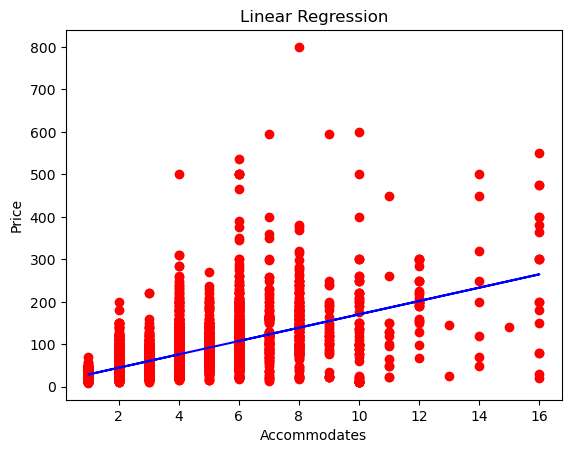

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a Pandas DataFrame
df = pd.read_excel("Airbnb_Madrid.xlsx")

# Fit a linear regression model
model = LinearRegression()
X = df['Accommodates'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title('Linear Regression')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()